In [103]:
# Name - ASHISH TRIVEDI Email - triashish7@gmail.com
# Github URL - https://github.com/ashishtrivedi16

In [104]:
! pip install nsepy

In [105]:
import pandas as pd
import numpy as np
from nsepy import get_history
from datetime import date

In [106]:
data_infy = get_history(symbol='INFY', start=date(2015,1,1), end=date(2015,12,31))
data_infy.insert(0, 'Date', pd.to_datetime(data_infy.index,format='%Y-%m-%d'))

data_tcs = get_history(symbol='TCS', start=date(2015,1,1), end=date(2015,12,31))
data_tcs.insert(0, 'Date', pd.to_datetime(data_tcs.index,format='%Y-%m-%d'))

data_nifty_it = get_history(symbol='NIFTY IT', start=date(2015,1,1), end=date(2015,12,31), index=True)
data_nifty_it.insert(0, 'Date', pd.to_datetime(data_nifty_it.index,format='%Y-%m-%d'))

def features_build(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear
    
    return df
    
data_infy = features_build(data_infy)
data_tcs = features_build(data_tcs)
data_nifty_it = features_build(data_nifty_it)

def indexing(stock):
    stock.index = stock['Date']

indexing(data_infy)
indexing(data_tcs)
indexing(data_nifty_it)

In [107]:
data_infy.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,WeekOfYear
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,1,1
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2,1
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,5,2
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,6,2
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,7,2
2015-01-08,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920,8,2
2015-01-09,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004,9,2
2015-01-12,2015-01-12,INFY,EQ,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,6.696516e+14,107209,1818800,0.5702,12,3
2015-01-13,2015-01-13,INFY,EQ,2115.95,2107.80,2107.80,2075.00,2092.00,2088.90,2089.42,2200309,4.597374e+14,66676,1385009,0.6295,13,3


In [108]:
data_tcs.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,WeekOfYear
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,1,1
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2,1
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,5,2
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,6,2
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,7,2
2015-01-08,2015-01-08,TCS,EQ,2417.70,2442.4,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759,8,2
2015-01-09,2015-01-09,TCS,EQ,2443.80,2455.0,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415,9,2
2015-01-12,2015-01-12,TCS,EQ,2512.30,2517.0,2528.00,2480.25,2527.95,2509.70,2497.82,798003,1.993266e+14,58810,451228,0.5654,12,3
2015-01-13,2015-01-13,TCS,EQ,2509.70,2520.0,2530.40,2480.10,2498.00,2497.90,2509.40,734216,1.842440e+14,49993,386133,0.5259,13,3


In [109]:
data_nifty_it.head(10)

,Date,Open,High,Low,Close,Volume,Turnover,Day,WeekOfYear
Date,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,1,1
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2,1
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,5,2
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,6,2
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,7,2
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,8,2
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,9,2
2015-01-12,2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,12,3
2015-01-13,2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,13,3


In [110]:
# 1. Create 4,16,....,52 week moving average(closing price) for each stock and index. This should happen through a function.

def moving_average(stock, weeks = [4, 16, 28, 40, 52]):
    
    data = pd.DataFrame()
    
    data['Close'] = stock['Close'].resample('W').mean()
    
    for i in range(len(weeks)):
        ma = data['Close'].rolling(weeks[i]).mean()
        data[str(weeks[i]) + " weeks"] = ma
        
    return data
    
ma_infy = moving_average(data_infy)
ma_tcs = moving_average(data_tcs)
ma_nifty_it = moving_average(data_nifty_it)

In [131]:
ma_infy.head(365)

,Close,4 weeks,16 weeks,28 weeks,40 weeks,52 weeks
Date,,,,,,
2015-01-04,1993.8000,NaN,NaN,NaN,NaN,NaN
2015-01-05,1993.8000,NaN,NaN,NaN,NaN,NaN
2015-01-06,1993.8000,NaN,NaN,NaN,NaN,NaN
2015-01-07,1993.8000,NaN,NaN,NaN,NaN,NaN
2015-01-08,1993.8000,NaN,NaN,NaN,NaN,NaN
2015-01-09,1993.8000,NaN,NaN,NaN,NaN,NaN
2015-01-10,1993.8000,NaN,NaN,NaN,NaN,NaN
2015-01-11,1992.3100,NaN,NaN,NaN,NaN,NaN
2015-01-12,1992.3100,NaN,NaN,NaN,NaN,NaN


In [132]:
ma_tcs.head(365)

,Close,4 weeks,16 weeks,28 weeks,40 weeks,52 weeks
Date,,,,,,
2015-01-04,2562.5000,NaN,NaN,NaN,NaN,NaN
2015-01-05,2562.5000,NaN,NaN,NaN,NaN,NaN
2015-01-06,2562.5000,NaN,NaN,NaN,NaN,NaN
2015-01-07,2562.5000,NaN,NaN,NaN,NaN,NaN
2015-01-08,2562.5000,NaN,NaN,NaN,NaN,NaN
2015-01-09,2562.5000,NaN,NaN,NaN,NaN,NaN
2015-01-10,2562.5000,NaN,NaN,NaN,NaN,NaN
2015-01-11,2472.1300,NaN,NaN,NaN,NaN,NaN
2015-01-12,2472.1300,NaN,NaN,NaN,NaN,NaN


In [133]:
ma_nifty_it.head(365)

,Close,4 weeks,16 weeks,28 weeks,40 weeks,52 weeks
Date,,,,,,
2015-01-04,11293.9000,NaN,NaN,NaN,NaN,NaN
2015-01-05,11293.9000,NaN,NaN,NaN,NaN,NaN
2015-01-06,11293.9000,NaN,NaN,NaN,NaN,NaN
2015-01-07,11293.9000,NaN,NaN,NaN,NaN,NaN
2015-01-08,11293.9000,NaN,NaN,NaN,NaN,NaN
2015-01-09,11293.9000,NaN,NaN,NaN,NaN,NaN
2015-01-10,11293.9000,NaN,NaN,NaN,NaN,NaN
2015-01-11,11108.4500,NaN,NaN,NaN,NaN,NaN
2015-01-12,11108.4500,NaN,NaN,NaN,NaN,NaN


In [114]:
import seaborn as sns

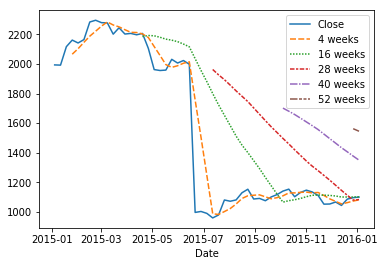

In [115]:
sns.lineplot(data = ma_infy)

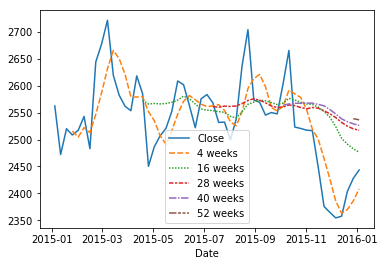

In [116]:
sns.lineplot(data = ma_tcs)

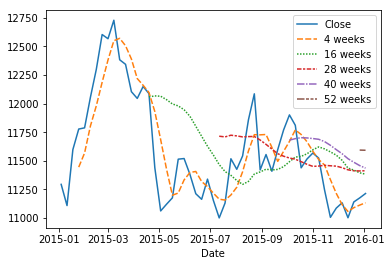

In [117]:
sns.lineplot(data = ma_nifty_it)

In [118]:
# 2. Create rolling window of size 10 on each stock/index. Handle unequal time series due to stock market holidays. 
# You should look to increase your rolling window size to 75 and see how the data looks like. 
# Remember they will create stress on your laptop RAM load. 
# ( Documentation you might need: http://in.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html)

# Holidays are on saturaday and sunday's
# So closing prices on friday can be filled for those holidays
ma_infy = ma_infy.asfreq('D', method = 'pad')
ma_tcs = ma_tcs.asfreq('D', method = 'pad')
ma_nifty_it = ma_nifty_it.asfreq('D', method = 'pad')

def moving_average_(stock, weeks = [10, 75]):
    
    data = pd.DataFrame()
    
    data['Close'] = stock['Close']
    
    for i in range(len(weeks)):
        ma = data['Close'].rolling(weeks[i]).mean()
        data[str(weeks[i]) + " weeks"] = ma
        
    return data

ma_infy_ = moving_average_(ma_infy)
ma_tcs_ = moving_average_(ma_tcs)
ma_nifty_it_ = moving_average_(ma_nifty_it)

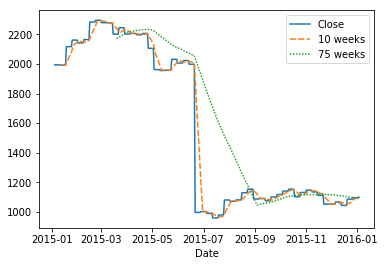

In [119]:
sns.lineplot(data = ma_infy_)

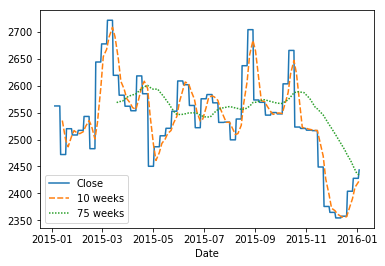

In [120]:
sns.lineplot(data = ma_tcs_)

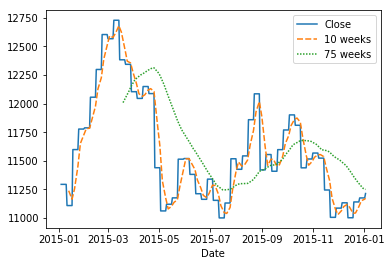

In [121]:
sns.lineplot(data = ma_nifty_it_)

In [122]:
# 3.1 Volume shocks - If volume traded is 10% higher/lower than previous day - make a 0/1 boolean time series for shock,
# 0/1 dummy-coded time series for direction of shock.

def volume_shock(stock):
    
    stock['Volume_next'] = stock.Volume.shift(1)
    
    stock['Volume_shock'] = (abs(stock['Volume_next'] - stock['Volume'])/stock['Volume'] > 0.1).astype(int)
    
    return stock

def shock_direction(stock):
    
    if stock['Volume_shock'] == 0:
        pass
    else:
        if (stock['Volume_next'] - stock['Volume'] < 0):
            return 0
        else:
            return 1
        
def volume_shock_dir(stock):
    stock['Volume_shock_dir'] = 'NaN'
    stock['Volume_shock_dir'] = stock.apply(shock_direction, axis = 1)
    
    return stock

data_infy = volume_shock(data_infy)
data_tcs = volume_shock(data_tcs)
data_nifty_it = volume_shock(data_nifty_it)

data_infy = volume_shock_dir(data_infy)
data_tcs = volume_shock_dir(data_tcs)
data_nifty_it = volume_shock_dir(data_nifty_it)

In [135]:
data_infy.head(248)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,WeekOfYear,Volume_next,Volume_shock,Volume_shock_dir,Close_price_next,Price_shock,Price_shock_dir
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,1,1,NaN,0,NaN,NaN,0,NaN
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2,1,500691.0,1,0.0,1974.40,0,NaN
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,5,2,1694580.0,1,0.0,2013.20,0,NaN
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,6,2,2484256.0,0,NaN,1995.90,1,1.0
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,7,2,2416829.0,1,1.0,1954.20,0,NaN
2015-01-08,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920,8,2,1812479.0,1,0.0,1963.55,0,NaN
2015-01-09,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004,9,2,3391230.0,1,0.0,1973.45,1,0.0
2015-01-12,2015-01-12,INFY,EQ,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,6.696516e+14,107209,1818800,0.5702,12,3,11215832.0,1,1.0,2074.45,0,NaN
2015-01-13,2015-01-13,INFY,EQ,2115.95,2107.80,2107.80,2075.00,2092.00,2088.90,2089.42,2200309,4.597374e+14,66676,1385009,0.6295,13,3,3189722.0,1,1.0,2115.95,0,NaN


In [136]:
data_tcs.head(248)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,WeekOfYear,Volume_next,Volume_shock,Volume_shock_dir,Close_price_next,Price_shock,Price_shock_dir
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,1,1,NaN,0,NaN,NaN,0,NaN
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2,1,183415.0,1,0.0,2545.55,0,NaN
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,5,2,462870.0,1,0.0,2579.45,0,NaN
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,6,2,877121.0,1,0.0,2540.25,1,1.0
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,7,2,1211892.0,0,NaN,2446.60,0,NaN
2015-01-08,2015-01-08,TCS,EQ,2417.70,2442.40,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759,8,2,1318166.0,1,1.0,2417.70,0,NaN
2015-01-09,2015-01-09,TCS,EQ,2443.80,2455.00,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415,9,2,782704.0,1,0.0,2443.80,1,0.0
2015-01-12,2015-01-12,TCS,EQ,2512.30,2517.00,2528.00,2480.25,2527.95,2509.70,2497.82,798003,1.993266e+14,58810,451228,0.5654,12,3,1598821.0,1,1.0,2512.30,0,NaN
2015-01-13,2015-01-13,TCS,EQ,2509.70,2520.00,2530.40,2480.10,2498.00,2497.90,2509.40,734216,1.842440e+14,49993,386133,0.5259,13,3,798003.0,0,NaN,2509.70,0,NaN


In [137]:
data_nifty_it.head(248)

,Date,Open,High,Low,Close,Volume,Turnover,Day,WeekOfYear,Volume_next,Volume_shock,Volume_shock_dir,Close_price_next,Price_shock,Price_shock_dir
Date,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,1,1,NaN,0,NaN,NaN,0,NaN
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2,1,4246150.0,1,0.0,11215.70,0,NaN
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,5,2,10004862.0,1,1.0,11372.10,0,NaN
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,6,2,8858018.0,1,0.0,11248.55,1,1.0
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,7,2,12515739.0,1,1.0,10959.90,0,NaN
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,8,2,10976356.0,1,0.0,10916.00,0,NaN
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,9,2,12975117.0,1,0.0,11018.15,1,0.0
2015-01-12,2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,12,3,24812224.0,1,1.0,11399.65,0,NaN
2015-01-13,2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,13,3,16505074.0,1,1.0,11543.65,0,NaN


In [126]:
# 3.2 Price shocks - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock, 
# 0/1 dummy-coded time series for direction of shock.

def price_shock(stock):
    
    stock['Close_price_next'] = stock.Close.shift(1)
    
    stock['Price_shock'] = (abs(stock['Close_price_next'] - stock['Close'])/stock['Close'] > 0.02).astype(int)
    
    return stock

def shock_direction(stock):
    
    if stock['Price_shock'] == 0:
        pass
    else:
        if (stock['Close_price_next'] - stock['Close'] < 0):
            return 0
        else:
            return 1
        
def price_shock_dir(stock):
    stock['Price_shock_dir'] = 'NaN'
    stock['Price_shock_dir'] = stock.apply(shock_direction, axis = 1)
    
    return stock

data_infy = price_shock(data_infy)
data_tcs = price_shock(data_tcs)
data_nifty_it = price_shock(data_nifty_it)

data_infy = price_shock_dir(data_infy)
data_tcs = price_shock_dir(data_tcs)
data_nifty_it = price_shock_dir(data_nifty_it)

In [139]:
data_infy.head(248)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,WeekOfYear,Volume_next,Volume_shock,Volume_shock_dir,Close_price_next,Price_shock,Price_shock_dir
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,1,1,NaN,0,NaN,NaN,0,NaN
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2,1,500691.0,1,0.0,1974.40,0,NaN
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,5,2,1694580.0,1,0.0,2013.20,0,NaN
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,6,2,2484256.0,0,NaN,1995.90,1,1.0
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,7,2,2416829.0,1,1.0,1954.20,0,NaN
2015-01-08,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920,8,2,1812479.0,1,0.0,1963.55,0,NaN
2015-01-09,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004,9,2,3391230.0,1,0.0,1973.45,1,0.0
2015-01-12,2015-01-12,INFY,EQ,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,6.696516e+14,107209,1818800,0.5702,12,3,11215832.0,1,1.0,2074.45,0,NaN
2015-01-13,2015-01-13,INFY,EQ,2115.95,2107.80,2107.80,2075.00,2092.00,2088.90,2089.42,2200309,4.597374e+14,66676,1385009,0.6295,13,3,3189722.0,1,1.0,2115.95,0,NaN


In [140]:
data_tcs.head(248)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,WeekOfYear,Volume_next,Volume_shock,Volume_shock_dir,Close_price_next,Price_shock,Price_shock_dir
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,1,1,NaN,0,NaN,NaN,0,NaN
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2,1,183415.0,1,0.0,2545.55,0,NaN
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,5,2,462870.0,1,0.0,2579.45,0,NaN
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,6,2,877121.0,1,0.0,2540.25,1,1.0
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,7,2,1211892.0,0,NaN,2446.60,0,NaN
2015-01-08,2015-01-08,TCS,EQ,2417.70,2442.40,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759,8,2,1318166.0,1,1.0,2417.70,0,NaN
2015-01-09,2015-01-09,TCS,EQ,2443.80,2455.00,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415,9,2,782704.0,1,0.0,2443.80,1,0.0
2015-01-12,2015-01-12,TCS,EQ,2512.30,2517.00,2528.00,2480.25,2527.95,2509.70,2497.82,798003,1.993266e+14,58810,451228,0.5654,12,3,1598821.0,1,1.0,2512.30,0,NaN
2015-01-13,2015-01-13,TCS,EQ,2509.70,2520.00,2530.40,2480.10,2498.00,2497.90,2509.40,734216,1.842440e+14,49993,386133,0.5259,13,3,798003.0,0,NaN,2509.70,0,NaN


In [141]:
data_nifty_it.head(248)

,Date,Open,High,Low,Close,Volume,Turnover,Day,WeekOfYear,Volume_next,Volume_shock,Volume_shock_dir,Close_price_next,Price_shock,Price_shock_dir
Date,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,1,1,NaN,0,NaN,NaN,0,NaN
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2,1,4246150.0,1,0.0,11215.70,0,NaN
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,5,2,10004862.0,1,1.0,11372.10,0,NaN
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,6,2,8858018.0,1,0.0,11248.55,1,1.0
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,7,2,12515739.0,1,1.0,10959.90,0,NaN
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,8,2,10976356.0,1,0.0,10916.00,0,NaN
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,9,2,12975117.0,1,0.0,11018.15,1,0.0
2015-01-12,2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,12,3,24812224.0,1,1.0,11399.65,0,NaN
2015-01-13,2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,13,3,16505074.0,1,1.0,11543.65,0,NaN


In [143]:
# 3.3 Pricing black swan - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock,
# 0/1 dummy-coded time series for direction of shock.

# This is same as price shock

data_infy['price_black_swan'] = data_infy['Price_shock']
data_tcs['price_black_swan'] = data_tcs['Price_shock']
data_nifty_it['price_black_swan'] = data_nifty_it['Price_shock']

In [144]:
data_infy.head(248)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,WeekOfYear,Volume_next,Volume_shock,Volume_shock_dir,Close_price_next,Price_shock,Price_shock_dir,price_black_swan
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,1,1,NaN,0,NaN,NaN,0,NaN,0
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2,1,500691.0,1,0.0,1974.40,0,NaN,0
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,5,2,1694580.0,1,0.0,2013.20,0,NaN,0
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,6,2,2484256.0,0,NaN,1995.90,1,1.0,1
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,7,2,2416829.0,1,1.0,1954.20,0,NaN,0
2015-01-08,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920,8,2,1812479.0,1,0.0,1963.55,0,NaN,0
2015-01-09,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004,9,2,3391230.0,1,0.0,1973.45,1,0.0,1
2015-01-12,2015-01-12,INFY,EQ,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,6.696516e+14,107209,1818800,0.5702,12,3,11215832.0,1,1.0,2074.45,0,NaN,0
2015-01-13,2015-01-13,INFY,EQ,2115.95,2107.80,2107.80,2075.00,2092.00,2088.90,2089.42,2200309,4.597374e+14,66676,1385009,0.6295,13,3,3189722.0,1,1.0,2115.95,0,NaN,0


In [145]:
data_tcs.head(248)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,WeekOfYear,Volume_next,Volume_shock,Volume_shock_dir,Close_price_next,Price_shock,Price_shock_dir,price_black_swan
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,1,1,NaN,0,NaN,NaN,0,NaN,0
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2,1,183415.0,1,0.0,2545.55,0,NaN,0
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,5,2,462870.0,1,0.0,2579.45,0,NaN,0
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,6,2,877121.0,1,0.0,2540.25,1,1.0,1
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,7,2,1211892.0,0,NaN,2446.60,0,NaN,0
2015-01-08,2015-01-08,TCS,EQ,2417.70,2442.40,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759,8,2,1318166.0,1,1.0,2417.70,0,NaN,0
2015-01-09,2015-01-09,TCS,EQ,2443.80,2455.00,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415,9,2,782704.0,1,0.0,2443.80,1,0.0,1
2015-01-12,2015-01-12,TCS,EQ,2512.30,2517.00,2528.00,2480.25,2527.95,2509.70,2497.82,798003,1.993266e+14,58810,451228,0.5654,12,3,1598821.0,1,1.0,2512.30,0,NaN,0
2015-01-13,2015-01-13,TCS,EQ,2509.70,2520.00,2530.40,2480.10,2498.00,2497.90,2509.40,734216,1.842440e+14,49993,386133,0.5259,13,3,798003.0,0,NaN,2509.70,0,NaN,0


In [146]:
data_nifty_it.head(248)

,Date,Open,High,Low,Close,Volume,Turnover,Day,WeekOfYear,Volume_next,Volume_shock,Volume_shock_dir,Close_price_next,Price_shock,Price_shock_dir,price_black_swan
Date,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,1,1,NaN,0,NaN,NaN,0,NaN,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2,1,4246150.0,1,0.0,11215.70,0,NaN,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,5,2,10004862.0,1,1.0,11372.10,0,NaN,0
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,6,2,8858018.0,1,0.0,11248.55,1,1.0,1
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,7,2,12515739.0,1,1.0,10959.90,0,NaN,0
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,8,2,10976356.0,1,0.0,10916.00,0,NaN,0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,9,2,12975117.0,1,0.0,11018.15,1,0.0,1
2015-01-12,2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,12,3,24812224.0,1,1.0,11399.65,0,NaN,0
2015-01-13,2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,13,3,16505074.0,1,1.0,11543.65,0,NaN,0


In [147]:
# 3.4 Pricing shock without volume shock - based on points a & b - Make a 0/1 dummy time series.

def price_shock_without_volume_shock(stock):
    
    stock["not_vol_shock"]  = (~(stock["Volume_shock"].astype(bool))).astype(int)
    stock["price_shock_without_volume_shock"] = stock["not_vol_shock"] & stock["Price_shock"]
    
    return stock

data_infy = price_shock_without_volume_shock(data_infy)
data_tcs = price_shock_without_volume_shock(data_tcs)
data_nifty_it = price_shock_without_volume_shock(data_nifty_it)

In [148]:
data_infy.head(248)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,WeekOfYear,Volume_next,Volume_shock,Volume_shock_dir,Close_price_next,Price_shock,Price_shock_dir,price_black_swan,not_vol_shock,price_shock_without_volume_shock
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,1,1,NaN,0,NaN,NaN,0,NaN,0,1,0
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2,1,500691.0,1,0.0,1974.40,0,NaN,0,0,0
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,5,2,1694580.0,1,0.0,2013.20,0,NaN,0,0,0
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,6,2,2484256.0,0,NaN,1995.90,1,1.0,1,1,1
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,7,2,2416829.0,1,1.0,1954.20,0,NaN,0,0,0
2015-01-08,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920,8,2,1812479.0,1,0.0,1963.55,0,NaN,0,0,0
2015-01-09,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004,9,2,3391230.0,1,0.0,1973.45,1,0.0,1,0,0
2015-01-12,2015-01-12,INFY,EQ,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,6.696516e+14,107209,1818800,0.5702,12,3,11215832.0,1,1.0,2074.45,0,NaN,0,0,0
2015-01-13,2015-01-13,INFY,EQ,2115.95,2107.80,2107.80,2075.00,2092.00,2088.90,2089.42,2200309,4.597374e+14,66676,1385009,0.6295,13,3,3189722.0,1,1.0,2115.95,0,NaN,0,0,0
